 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_csvpath = Path('.\Resources\whale_returns.csv')
whale_dataframe = pd.read_csv(whale_csvpath)
whale_dataframe.head()


,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
print(f"The number of nulls are:")
print(f"{whale_dataframe.isnull().sum()}")
print(f"   ")

print(f"The % of nulls are:")
print(whale_dataframe.isnull().mean() * 100)


The number of nulls are:
Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64
   
The % of nulls are:
Date                           0.00000
SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64


In [4]:
# Drop nulls
whale_dataframe = whale_dataframe.dropna().copy()

# Check nulls
print(f"The number of nulls are:")
print(f"{whale_dataframe.isnull().sum()}")

The number of nulls are:
Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algor_path = Path('./Resources/algo_returns.csv')
algor_dataframe = pd.read_csv(algor_path)                
algor_dataframe.head(10)

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN
5,2014-06-04,-0.001838,NaN
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735


In [6]:
# Count nulls
algor_dataframe.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algor_dataframe = algor_dataframe.dropna().copy()

# Check nulls
algor_dataframe.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_csv = Path('./Resources/sp500_history.csv')
sp500_dataframe = pd.read_csv(sp500_csv)
sp500_dataframe.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [9]:
# Check Data Types
# adding a blank line in between for neatness
print(whale_dataframe.dtypes)
print()
print(algor_dataframe.dtypes)
print()
print(sp500_dataframe.dtypes)


Date                            object
SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

Date       object
Algo 1    float64
Algo 2    float64
dtype: object

Date     object
Close    object
dtype: object


### Fix Data Types:

In [10]:
# SP500 Close column: Remove $, and amend Price from string format to float format.
sp500_dataframe['Close'] = sp500_dataframe['Close'].str.replace('$','')
sp500_dataframe['Close'] = sp500_dataframe['Close'].astype(float)

# SP500 Date column: Amend  from object to date_time format, and make it the reference.
sp500_dataframe = sp500_dataframe.set_index(pd.to_datetime(sp500_dataframe["Date"], infer_datetime_format=True))
# SP500: drop the original Date column.
sp500_dataframe = sp500_dataframe.drop(columns = ['Date'])
sp500_dataframe = sp500_dataframe.sort_index()

sp500_dataframe.head()


<ipython-input-10-3f45c9b04b59>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_dataframe['Close'] = sp500_dataframe['Close'].str.replace('$','')


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [11]:
sp500_dataframe['Close'].dtypes

dtype('float64')

In [12]:
# Whale Date column: change to date-time format, and make it the reference.
whale_dataframe = whale_dataframe.set_index(pd.to_datetime(whale_dataframe["Date"], infer_datetime_format=True))
# Whale: remove original Date column.
whale_dataframe = whale_dataframe.drop(columns = ['Date'])
whale_dataframe = whale_dataframe.sort_index()
whale_dataframe.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [13]:
# Algorithmic Date column: change to date-time format, and make it the reference.
algor_dataframe = algor_dataframe.set_index(pd.to_datetime(algor_dataframe["Date"], infer_datetime_format=True))
# Algorithmic: remove original Date column.
algor_dataframe = algor_dataframe.drop(columns = ['Date'])
algor_dataframe = algor_dataframe.sort_index()
algor_dataframe.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [14]:
# Calculate Daily Returns
# for SP500 portfolio
sp500_daily_returns = sp500_dataframe.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [15]:
# Drop nulls
print(sp500_daily_returns.isnull().sum())
sp500_daily_returns = sp500_daily_returns.dropna()


Close    1
dtype: int64


In [16]:
# Check nulls
sp500_daily_returns.isnull().sum()


Close    0
dtype: int64

In [17]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns = sp500_daily_returns.rename(columns ={"Close":"SP500 Returns"})
sp500_daily_returns.head()

,SP500 Returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [18]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns = pd.concat([whale_dataframe,algor_dataframe,sp500_daily_returns],axis='columns', join="inner")
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

[Text(0, 0.5, 'Daily return')]

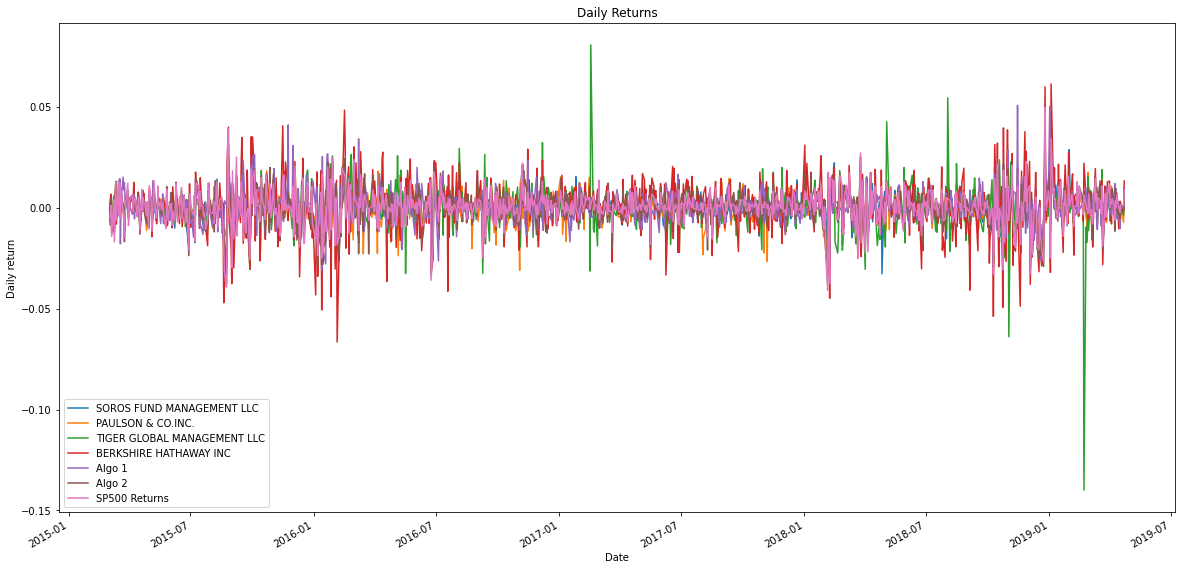

In [19]:
# Plot daily returns of all portfolios
daily_returns_ax = all_returns.plot(figsize=(20,10), title='Daily Returns')
daily_returns_ax.set(ylabel='Daily return')

#### Calculate and Plot cumulative returns.

[Text(0, 0.5, 'Returns')]

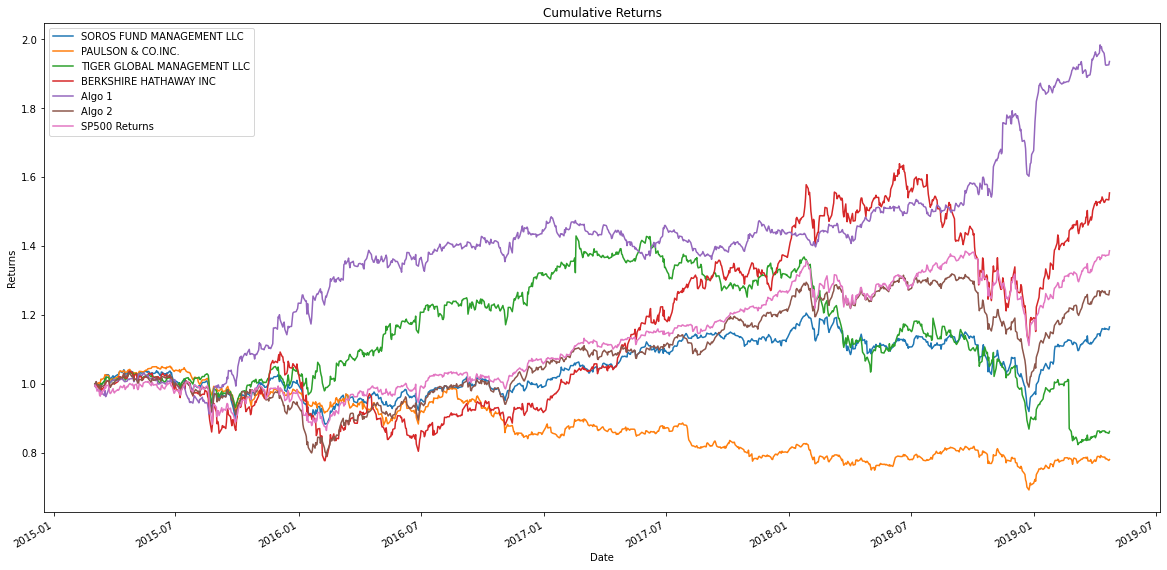

In [20]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_returns).cumprod()

# Plot cumulative returns
cum_return_ax = cumulative_returns.plot(figsize=(20,10),title='Cumulative Returns')

cum_return_ax.set(ylabel='Returns')


### The portfolios which outperformed the SP500 are Algo 1 and Berkshire Hathaway.  The other portfolios under performed the SP500.

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


[Text(0.5, 0, 'Portfolio'), Text(0, 0.5, 'Daily Returns')]

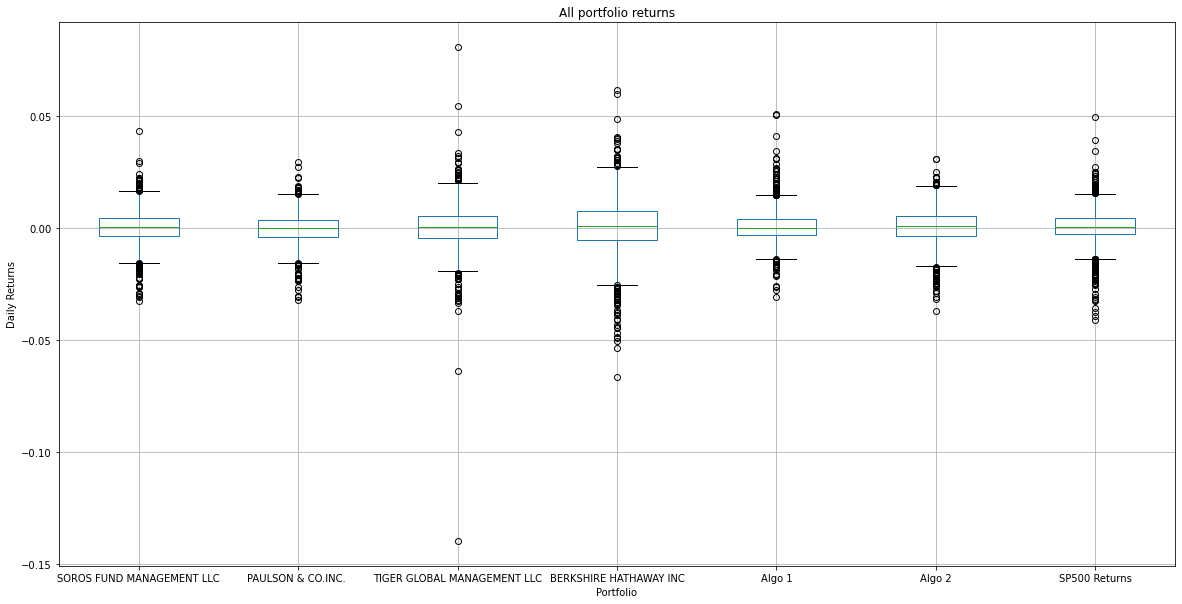

In [21]:
# Box plot to visually show risk
ax = all_returns.plot.box(figsize=(20,10),grid=True,title='All portfolio returns')

# set labels for axis
ax.set(xlabel='Portfolio', ylabel='Daily Returns')


### Calculate Standard Deviations

In [22]:
# Calculate the daily standard deviations of all portfolios

daily_std = all_returns.std()
daily_std.sort_values()


PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
SP500 Returns                  0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [23]:
# Calculate  the daily standard deviation of S&P 500
sp500_rtns_daily_std = sp500_daily_returns.std()
print(f"The daily standard deviation of the S&P 500 is {sp500_rtns_daily_std[0]:0.6f}")
print()

# Determine which portfolios are riskier than the S&P 500
print(f"Show which Portfolios have higher risk than the S&P 500:")
print(daily_std > sp500_rtns_daily_std[0])
print()
print(f"The portfolios which are riskier than the S&P 500 are:")
print("Algo2, Tiger Global Management LLC, and Berkshire Hathaway Inc")


The daily standard deviation of the S&P 500 is 0.008111

Show which Portfolios have higher risk than the S&P 500:
SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                          True
SP500 Returns                   True
dtype: bool

The portfolios which are riskier than the S&P 500 are:
Algo2, Tiger Global Management LLC, and Berkshire Hathaway Inc


### Calculate the Annualized Standard Deviation

In [24]:
# Calculate the annualized standard deviation (252 trading days)
all_returns_annual_std = all_returns.std() * np.sqrt(252)
all_returns_annual_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500 Returns                  0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

[Text(0, 0.5, 'Standard Deviation')]

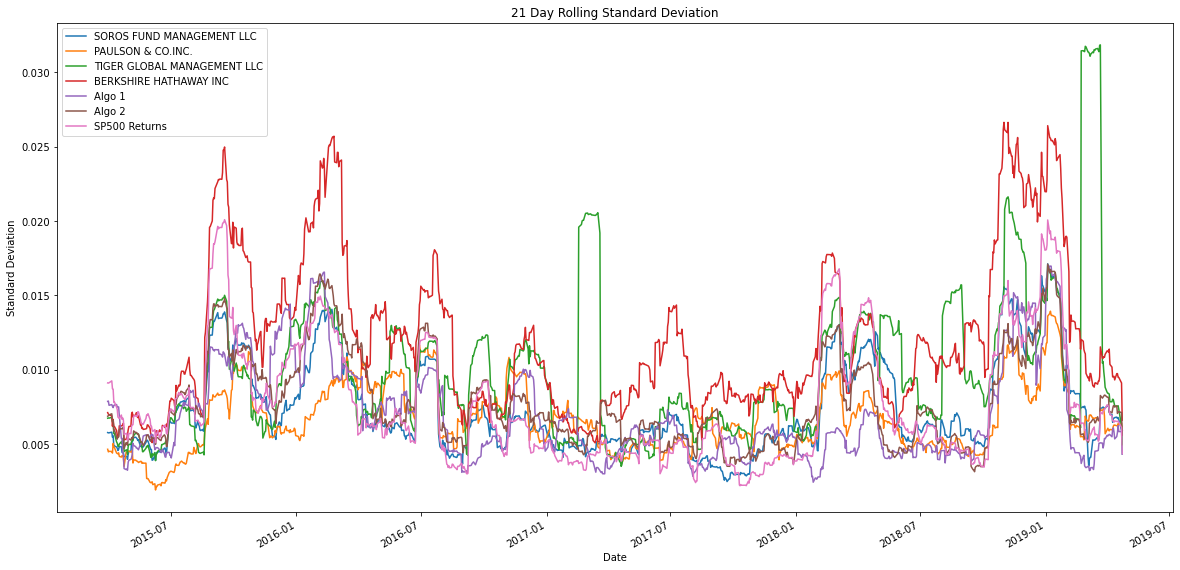

In [25]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_rtns_std_21day = all_returns.rolling(window=21).std()

# Plot the rolling standard deviation
ax_all_rtns_std_21day = all_rtns_std_21day.plot(figsize=(20,10),title='21 Day Rolling Standard Deviation')
ax_all_rtns_std_21day.set(ylabel='Standard Deviation')

### Calculate and plot the correlation

In [26]:
# Calculate the correlation
correlation = all_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500 Returns,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

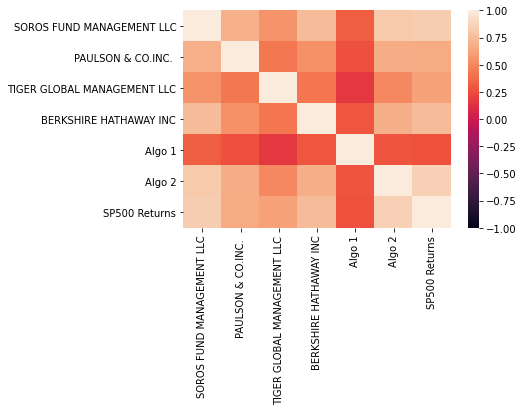

In [27]:
# Display the correlation matrix
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

### Algo 2 has the highest correlation to the SP500 and may best mimic the SP500.

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [28]:
# Calculate covariance of a single portfolio - 60 days rolling
# Algo 2:
algo2_cov_60day = all_returns['Algo 2'].rolling(window=60).cov(all_returns['SP500 Returns'])

# Calculate variance of S&P 500 - 60 day rolling
sp500_variance_60day = all_returns['SP500 Returns'].rolling(window=60).var()

# Computing beta - 60 day rolling
algo2_beta_60day = algo2_cov_60day / sp500_variance_60day


<AxesSubplot:title={'center':'Beta of Algorithimic 2 Portfolio, 60 day rolling'}, xlabel='Date'>

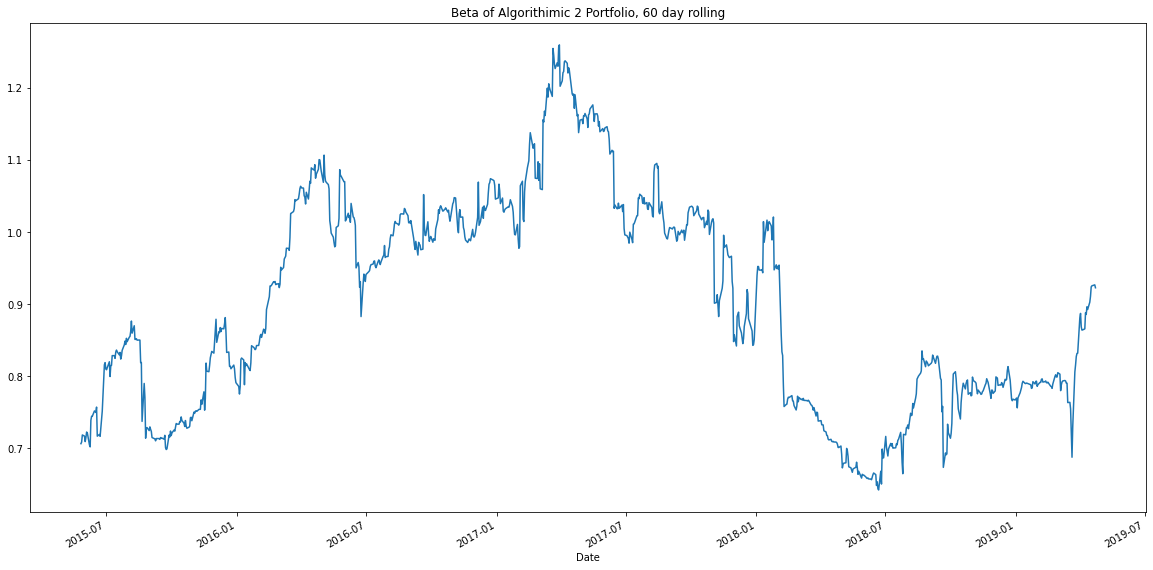

In [29]:
# Plot beta trend
algo2_beta_60day.plot(figsize=(20,10),title="Beta of Algorithimic 2 Portfolio, 60 day rolling")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

[Text(0, 0.5, 'Standard Deviation')]

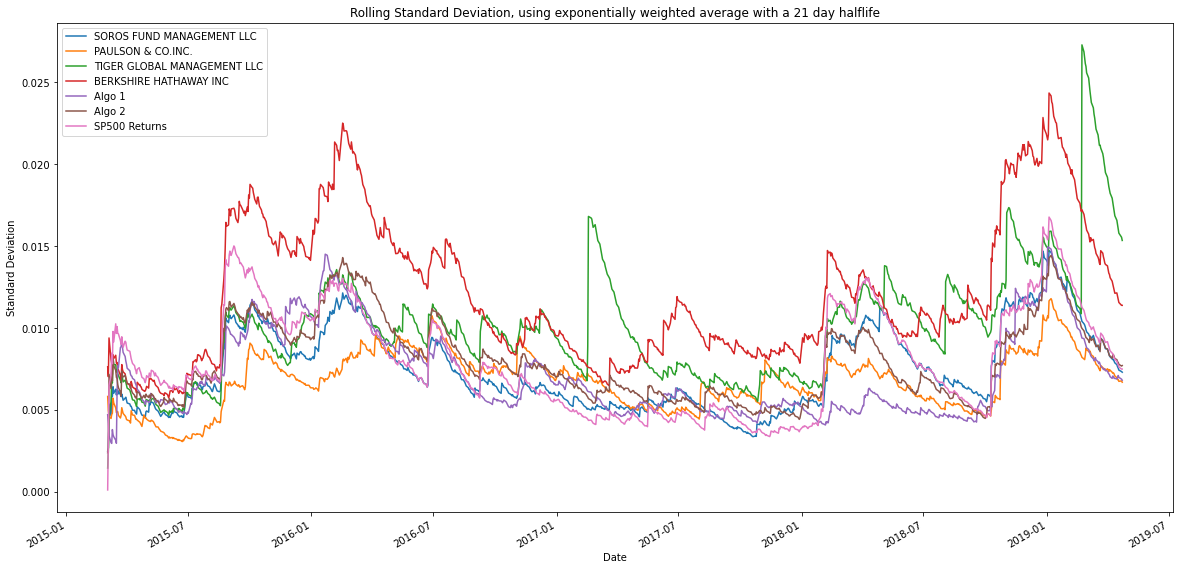

In [30]:
# Use `ewm` to calculate the rolling window - standard deviation

# Calculate the rolling standard deviation for all portfolios, using ewm with a 21-day halflife
all_rtns_std_21ewm = all_returns.ewm(halflife=21).std()

# Plot the rolling standard deviation, using ewm with a 21-day halflife
ax_all_rtns_std_21ewm = all_rtns_std_21ewm.plot(figsize=(20,10),title='Rolling Standard Deviation, using exponentially weighted average with a 21 day halflife')
ax_all_rtns_std_21ewm.set(ylabel='Standard Deviation')

<AxesSubplot:title={'center':'Beta of Algorithimic 2 Portfolio, exponentially weighted average with 21 day half life'}, xlabel='Date'>

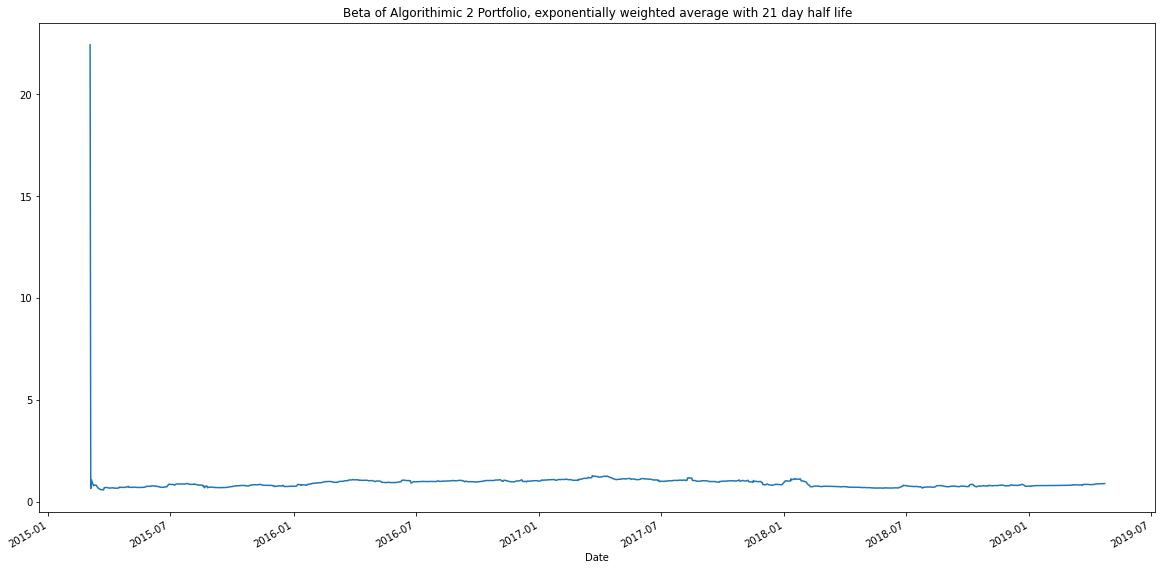

In [31]:
# Use `ewm` to calculate the rolling window - beta

# Calculate covariance of a single portfolio (Algo 2) - using ewm 21 day half life

algo2_cov_21ewm = all_returns['Algo 2'].ewm(halflife=21).cov(all_returns['SP500 Returns'])

# Calculate variance of S&P 500 - using ewm 21 day half life
sp500_variance_21ewm = all_returns['SP500 Returns'].ewm(halflife=21).var()

# Computing beta - using ewm 21 day half life
algo2_beta_21ewm = algo2_cov_21ewm / sp500_variance_21ewm

# Plot beta trend
algo2_beta_21ewm.plot(figsize=(20,10),title="Beta of Algorithimic 2 Portfolio, exponentially weighted average with 21 day half life")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [32]:
# Annualized Sharpe Ratios
# Assume the risk free rate is zero, as it's not provided.

daily_sharpes = (all_returns.mean()) / (all_returns.std())
sharpe_ratios = daily_sharpes * np.sqrt(252)
sharpe_ratios


SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500 Returns                  0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

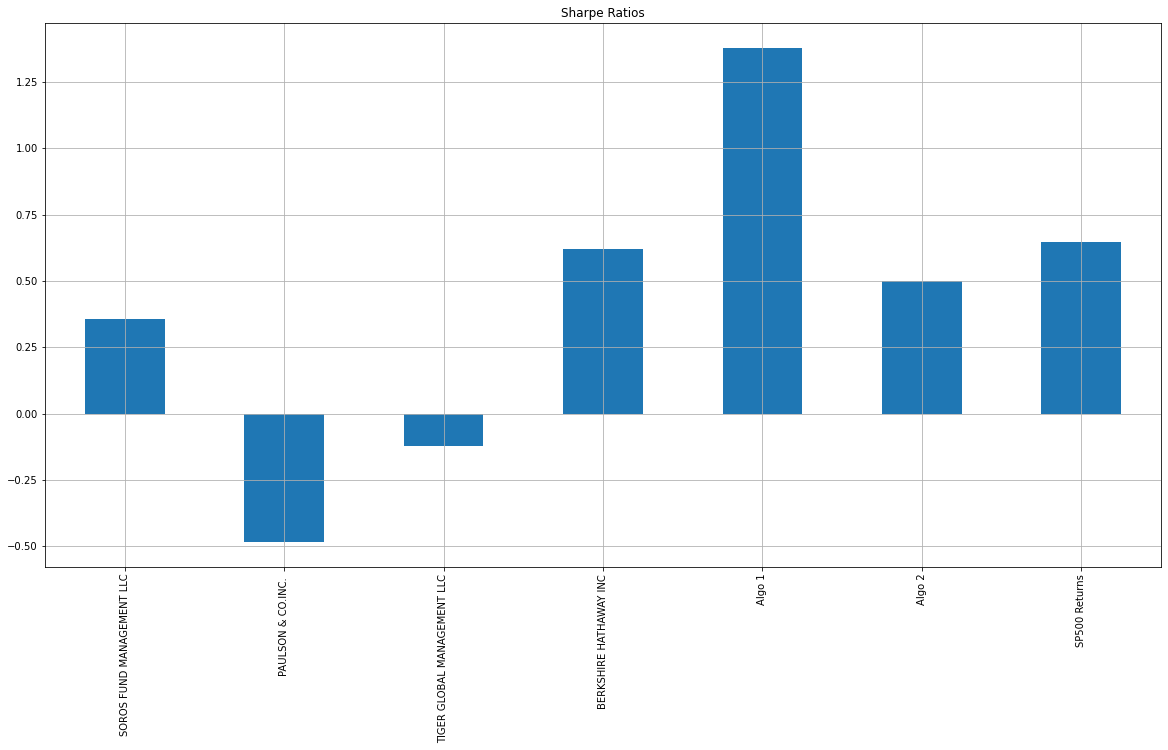

In [33]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios", figsize=(20,10), grid=True)


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

#### The Algorithimic portfolios have mixed results against the SP500 portfolio. Algorithimic 1 portfolio outperforms the SP500 and the other whale portfolios.  However, Algorithimic 2 performs worse on a risk adjusted basis than the SP500, and is worse than Berkshire, but better than 3 of the 4 whale portfolios.
---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [34]:
# Reading data from 1st stock

goog_csvpath = Path('.\Resources\goog_historical.csv')
goog_dataframe = pd.read_csv(goog_csvpath)
goog_dataframe.head()


,Symbol,Trade DATE,NOCP
0,GOOG,5/9/2019,1162.38
1,GOOG,5/8/2019,1166.27
2,GOOG,5/7/2019,1174.10
3,GOOG,5/6/2019,1189.39
4,GOOG,5/3/2019,1185.40


In [35]:
# Clean data:
# Amending reference to the Trade Date
goog_dataframe.set_index(pd.to_datetime(goog_dataframe["Trade DATE"], infer_datetime_format=True), inplace=True)

# Drop duplicated Trade Date column
goog_dataframe.drop(columns=['Trade DATE'], inplace=True)

# Amend NOCP column header to Goog, and drop duplicated Symbol column
goog_dataframe = goog_dataframe.rename(columns ={"NOCP":"GOOG"})

goog_dataframe.drop(columns=['Symbol'], inplace=True)
goog_dataframe

,GOOG
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40
...,...
2018-05-17,1078.59
2018-05-16,1081.77
2018-05-15,1079.23


In [36]:
# Reading data from 2nd stock

aapl_csvpath = Path('Resources/aapl_historical.csv')
aapl_dataframe = pd.read_csv(aapl_csvpath)
aapl_dataframe.head()


,Symbol,Trade DATE,NOCP
0,AAPL,5/9/2019,200.72
1,AAPL,5/8/2019,202.90
2,AAPL,5/7/2019,202.86
3,AAPL,5/6/2019,208.48
4,AAPL,5/3/2019,211.75


In [37]:
# Amending reference to Trade Date
aapl_dataframe.set_index(pd.to_datetime(aapl_dataframe["Trade DATE"], infer_datetime_format=True), inplace=True)
aapl_dataframe.head()


,Symbol,Trade DATE,NOCP
Trade DATE,,,
2019-05-09,AAPL,5/9/2019,200.72
2019-05-08,AAPL,5/8/2019,202.90
2019-05-07,AAPL,5/7/2019,202.86
2019-05-06,AAPL,5/6/2019,208.48
2019-05-03,AAPL,5/3/2019,211.75


In [38]:
# Clean data:
# Amending reference to the Trade Date
aapl_dataframe.set_index(pd.to_datetime(aapl_dataframe["Trade DATE"], infer_datetime_format=True), inplace=True)

# Drop duplicated Trade Date column
aapl_dataframe.drop(columns=['Trade DATE'], inplace=True)

# Amend NOCP column header to AAPL, and drop duplicated Symbol column
aapl_dataframe = aapl_dataframe.rename(columns ={"NOCP":"AAPL"})

aapl_dataframe.drop(columns=['Symbol'], inplace=True)
aapl_dataframe

,AAPL
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75
...,...
2018-05-17,186.99
2018-05-16,188.18
2018-05-15,186.44


In [39]:
# Reading data from 3rd stock

cost_csvpath = Path('.\Resources\cost_historical.csv')
cost_dataframe = pd.read_csv(cost_csvpath)
cost_dataframe.head()

,Symbol,Trade DATE,NOCP
0,COST,5/9/2019,243.47
1,COST,5/8/2019,241.34
2,COST,5/7/2019,240.18
3,COST,5/6/2019,244.23
4,COST,5/3/2019,244.62


In [40]:
# Clean data:
# Amending reference to Trade Date
cost_dataframe.set_index(pd.to_datetime(cost_dataframe["Trade DATE"], infer_datetime_format=True), inplace=True)

# Drop duplicated Trade Date column
cost_dataframe.drop(columns=['Trade DATE'], inplace=True)

# Amend NOCP column header to COST, and drop duplicated Symbol column
cost_dataframe = cost_dataframe.rename(columns ={"NOCP":"COST"})

cost_dataframe.drop(columns=['Symbol'], inplace=True)
cost_dataframe

,COST
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62
...,...
2018-05-17,199.60
2018-05-16,198.71
2018-05-15,195.48


In [41]:
# Combine all stocks in a single DataFrame

new_portfolio = pd.concat([goog_dataframe,aapl_dataframe,cost_dataframe],axis='columns')
new_portfolio

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62
...,...,...,...
2018-05-17,1078.59,186.99,199.60
2018-05-16,1081.77,188.18,198.71
2018-05-15,1079.23,186.44,195.48


In [42]:
# Reset Date index
# Date index already performed above.

In [43]:
# Reorganize portfolio data by having a column per symbol
# Already done above

In [44]:
# Calculate daily returns
# Sort by date index first
new_portfolio.sort_index(ascending=True)

daily_returns = new_portfolio.pct_change()
daily_returns.head()

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,NaN,NaN,NaN
2019-05-08,0.003347,0.010861,-0.008749
2019-05-07,0.006714,-0.000197,-0.004806
2019-05-06,0.013023,0.027704,0.016862
2019-05-03,-0.003355,0.015685,0.001597


In [45]:
# Drop NAs
# Check for na's before and after
print(daily_returns.isnull().sum())
daily_returns = daily_returns.dropna().copy()
print(daily_returns.isnull().sum())

GOOG    1
AAPL    1
COST    1
dtype: int64
GOOG    0
AAPL    0
COST    0
dtype: int64


In [46]:
# Display sample data
daily_returns.sample(5)

,GOOG,AAPL,COST
Trade DATE,,,
2018-09-28,-0.001539,-0.006688,0.000980
2018-11-23,-0.023593,-0.013343,0.002780
2019-01-29,-0.026114,-0.063964,-0.004921
2018-10-01,-0.004000,-0.008810,-0.007193
2018-12-10,-0.011600,0.005752,-0.016954


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [47]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_portfolio_returns = daily_returns.dot(weights)

# Display sample data
custom_portfolio_returns.sample(10)


Trade DATE
2018-11-15   -0.004199
2018-12-27    0.000431
2019-04-25    0.001745
2018-10-22   -0.003425
2019-02-11   -0.015686
2018-11-05   -0.011712
2018-07-30    0.000623
2019-02-13   -0.003280
2019-02-14   -0.000906
2019-01-22   -0.002421
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [48]:
# Join your returns DataFrame to the original returns DataFrame

combined_rtns_df = pd.concat([custom_portfolio_returns,all_returns],axis='columns')
combined_rtns_df.columns = ["Custom Portfolio","SOROS FUND MANAGEMENT LLC","PAULSON & CO.INC.","TIGER GLOBAL MANAGEMENT LLC","BERKSHIRE HATHAWAY INC","Algo 1","Algo 2","SP500 Returns"]
combined_rtns_df.sample(10)


,Custom Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Returns
2016-06-14,NaN,-0.004825,0.002466,-0.000772,-0.001768,-0.004552,-0.002970,-0.001799
2017-09-07,NaN,-0.001191,-0.001421,0.000242,0.006670,-0.007167,0.003524,-0.000178
2016-04-04,NaN,-0.003574,0.002968,-0.003514,-0.005377,-0.002449,-0.006787,-0.003208
2017-02-22,NaN,-0.005889,-0.004094,-0.012095,0.003114,-0.000979,-0.002566,-0.001082
2019-04-12,-0.007411,0.005663,-0.001165,0.004217,0.007316,-0.005501,0.004504,0.006609
2018-09-10,-0.013227,0.004552,0.000036,0.008984,-0.001346,-0.004582,0.002830,0.001898
2018-04-23,NaN,0.002767,-0.000789,-0.008146,-0.005842,0.005675,-0.003902,0.000056
2019-01-16,-0.006716,0.004426,0.000646,0.005657,0.004354,-0.001423,0.004469,0.002222
2015-11-18,NaN,0.014131,0.010304,0.015153,0.017857,0.002573,0.011199,0.016162
2017-12-27,NaN,-0.003361,-0.000916,-0.001548,0.000239,0.001046,-0.000624,0.000791


In [49]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

print(combined_rtns_df.isnull().sum())
combined_rtns_df = combined_rtns_df.dropna().copy()
print(combined_rtns_df.isnull().sum())


Custom Portfolio               805
SOROS FUND MANAGEMENT LLC       11
PAULSON & CO.INC.               11
TIGER GLOBAL MANAGEMENT LLC     11
BERKSHIRE HATHAWAY INC          11
Algo 1                          11
Algo 2                          11
SP500 Returns                   11
dtype: int64
Custom Portfolio               0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500 Returns                  0
dtype: int64


In [50]:
# Check data in cleaned & combined datafile:
combined_rtns_df.describe()

,Custom Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Returns
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,-0.000518,0.000230,0.000123,-0.000939,0.000139,0.001077,0.000046,0.000359
std,0.013398,0.009226,0.007338,0.014619,0.015539,0.008405,0.008773,0.009559
min,-0.056709,-0.029343,-0.032099,-0.139820,-0.053816,-0.026095,-0.031953,-0.032864
25%,-0.006802,-0.004033,-0.004299,-0.006582,-0.006692,-0.003170,-0.003637,-0.003110
50%,-0.001872,0.000723,0.000000,0.000000,0.000950,0.000223,0.000413,0.000710
75%,0.004860,0.004641,0.004432,0.006163,0.007528,0.003656,0.004895,0.004913
max,0.053867,0.042977,0.029338,0.054425,0.061341,0.050735,0.030822,0.049594


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [51]:
# Calculate the annualized `std`

combined_rtns_df_std = combined_rtns_df.std()
combined_rtns_df_std

Custom Portfolio               0.013398
SOROS FUND MANAGEMENT LLC      0.009226
PAULSON & CO.INC.              0.007338
TIGER GLOBAL MANAGEMENT LLC    0.014619
BERKSHIRE HATHAWAY INC         0.015539
Algo 1                         0.008405
Algo 2                         0.008773
SP500 Returns                  0.009559
dtype: float64

### Calculate and plot rolling `std` with 21-day window

[Text(0, 0.5, 'Standard Deviation')]

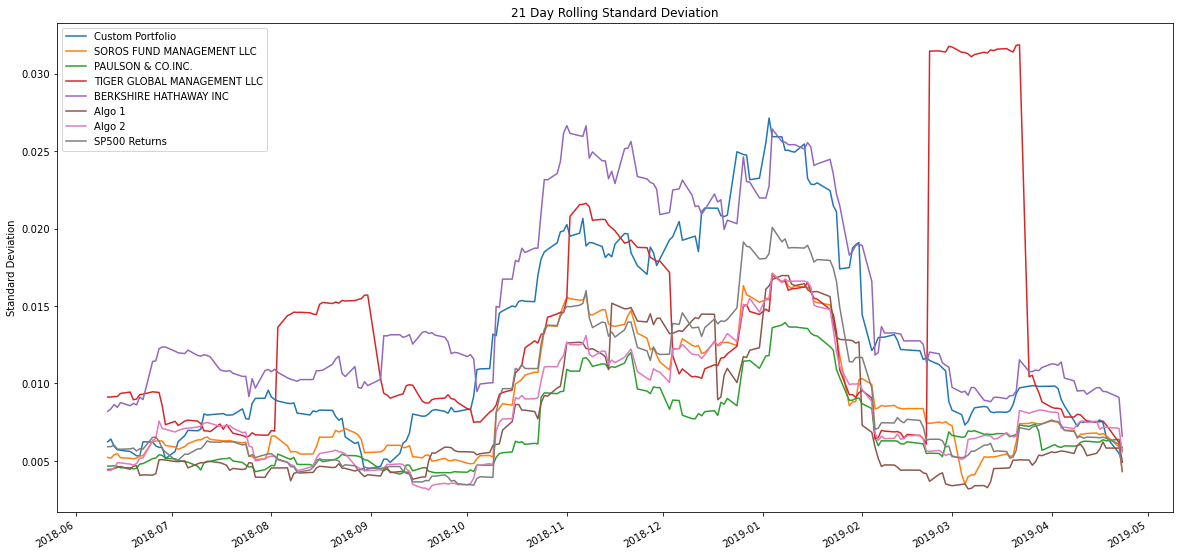

In [52]:
# Calculate rolling standard deviation
combined_rtns_df_std_21day = combined_rtns_df.rolling(window=21).std()

# Plot rolling standard deviation
ax_combined_rtns_df_std_21day = combined_rtns_df_std_21day.plot(figsize=(20,10),title='21 Day Rolling Standard Deviation')
ax_combined_rtns_df_std_21day.set(ylabel='Standard Deviation')

### Calculate and plot the correlation

<AxesSubplot:title={'center':'Correlation'}>

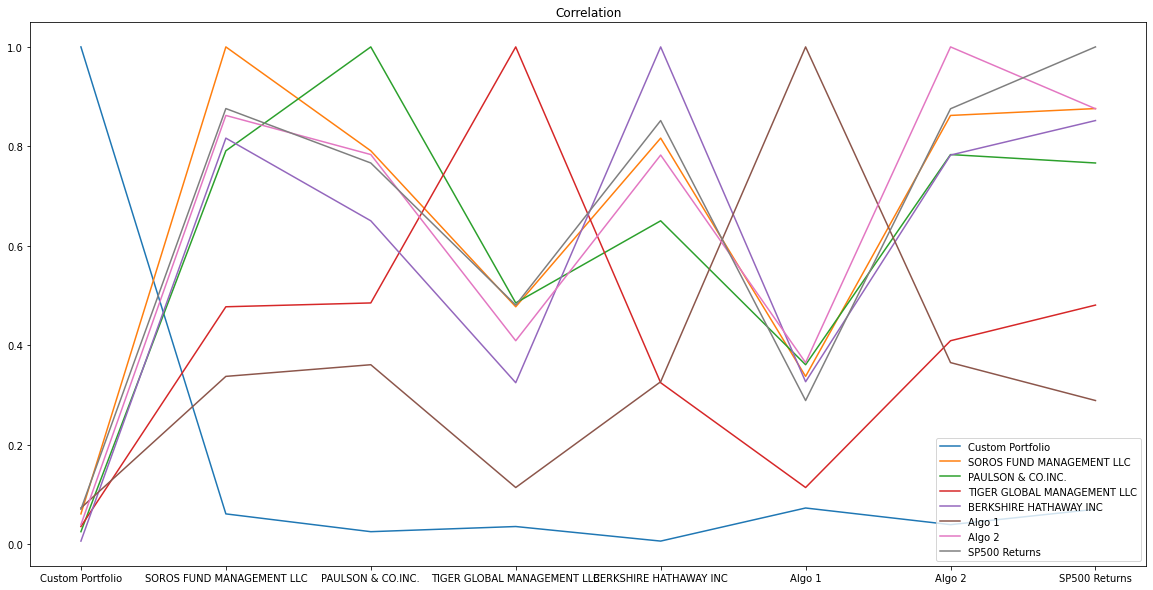

In [53]:
# Calculate and plot the correlation
combined_rtns_df_corr = combined_rtns_df.corr()
combined_rtns_df_corr.plot(figsize=(20,10),title="Correlation")

In [54]:
combined_rtns_df_corr

,Custom Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Returns
Custom Portfolio,1.000000,0.061454,0.025683,0.036044,0.006772,0.073278,0.039845,0.070790
SOROS FUND MANAGEMENT LLC,0.061454,1.000000,0.791191,0.477722,0.816670,0.337809,0.862258,0.876089
PAULSON & CO.INC.,0.025683,0.791191,1.000000,0.485421,0.650499,0.361243,0.783646,0.766696
TIGER GLOBAL MANAGEMENT LLC,0.036044,0.477722,0.485421,1.000000,0.325080,0.114449,0.409472,0.481095
BERKSHIRE HATHAWAY INC,0.006772,0.816670,0.650499,0.325080,1.000000,0.327043,0.782646,0.851968
Algo 1,0.073278,0.337809,0.361243,0.114449,0.327043,1.000000,0.365496,0.289290
Algo 2,0.039845,0.862258,0.783646,0.409472,0.782646,0.365496,1.000000,0.875699
SP500 Returns,0.070790,0.876089,0.766696,0.481095,0.851968,0.289290,0.875699,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Beta of Custom Portfolio'}>

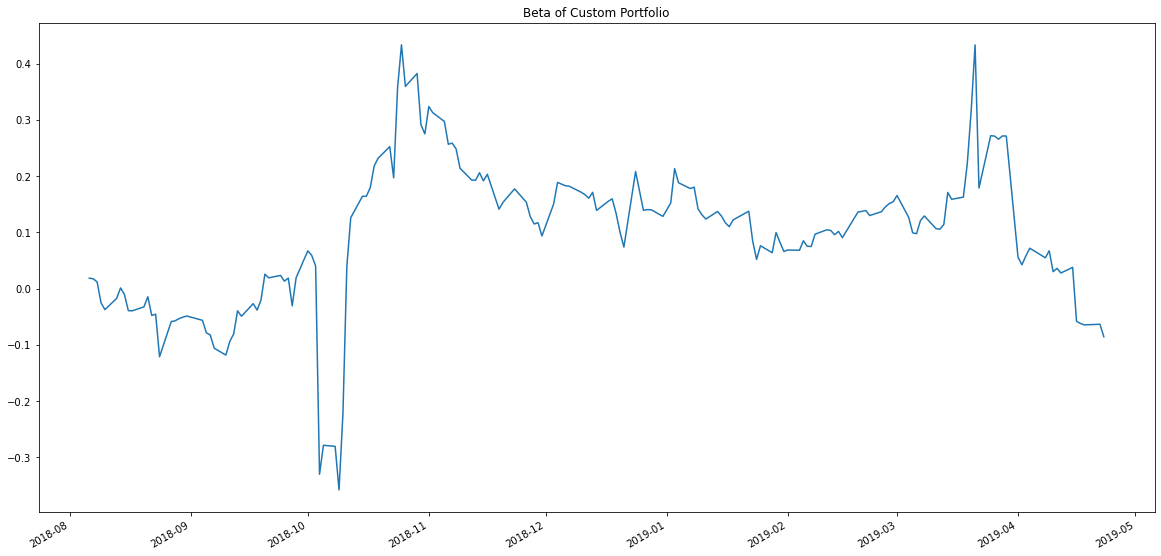

In [55]:
# Calculate and plot Beta

custom_cov_60day = combined_rtns_df['Custom Portfolio'].rolling(window=60).cov(combined_rtns_df['SP500 Returns'])
custom_var_60day = combined_rtns_df['SP500 Returns'].rolling(window=60).var()
custom_beta_60day = custom_cov_60day / custom_var_60day
custom_beta_60day.plot(figsize=(20,10),title="Beta of Custom Portfolio")


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [56]:
# Calculate Annualzied Sharpe Ratios
custom_daily_sharpes = (combined_rtns_df.mean()) / (combined_rtns_df.std())
custom_sharpe_ratios = custom_daily_sharpes * np.sqrt(252)
custom_sharpe_ratios


Custom Portfolio              -0.614330
SOROS FUND MANAGEMENT LLC      0.395449
PAULSON & CO.INC.              0.267115
TIGER GLOBAL MANAGEMENT LLC   -1.019946
BERKSHIRE HATHAWAY INC         0.141691
Algo 1                         2.034208
Algo 2                         0.082577
SP500 Returns                  0.595486
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

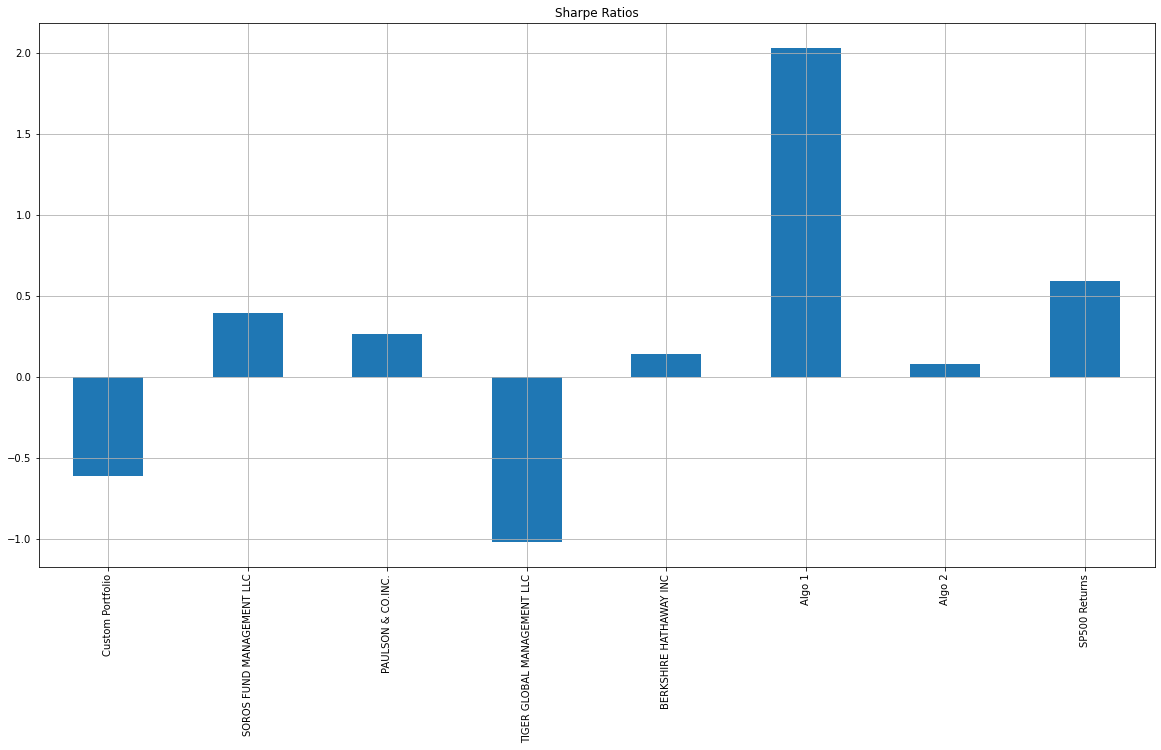

In [57]:
# Visualize the sharpe ratios as a bar plot
custom_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios",figsize=(20,10),grid=True)


### How does your portfolio do?

Write your answer here!

##### Not well!  The custom portfolio's sharpe is negative, indicating it is performing worse than the risk free rate (for this exercise assumed at 0).  It is performing worse than most porfolios (except Tiger Global), and is also performing worse than the SP500.  We'd be better off investing in Algo 1, or most of the other portfolios (except Tiger Global).